# Chapter 12 : 물리계 최적화하기

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from math import sin, cos, pi

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

## 12.1 포물선 운동 시뮬레이션 테스트하기

### 12.1.1 오일러 방법으로 시뮬레이션 만들기

In [5]:
def trajectory(theta, speed=20, height=0, dt=0.01, g=-9.81): # 타임스텝 dt, 중력장 강도 g, 각도 theta(도 단위)
    vx = 20 * cos(pi * theta / 180) # 입력 각도를 도에서 라디안으로 바꾼 뒤, 속도의 초기 x성분과 z성분을 계산한다.
    vz = 20 * sin(pi * theta / 180)
    t, x, z = 0, 0, height
    ts, xs, zs = [t], [x], [z] # 시뮬레이션하는 동안 모든 시간, x위치, z위치 값을 저장하는 리스트를 초기화한다.
    while z >= 0:
        t += dt # 시간, z속도, 위치를 갱신함. x방향으로 작용하는 힘이 없어지므로, x속도는 변경하지 않는다.
        vz += g * dt
        x += vx * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        zs.append(z)
    return ts, xs, zs

In [6]:
# trajectory함수를 실행한 출력 결과를 하나 이상 입력으로 주면 각 포탄의 경로를 나타내는 곡선을 그린다.
def plot_trajectories(*trajs,show_seconds=False):
    for traj in trajs:
        xs, zs = traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices = []
            second = 0
            for i,t in enumerate(traj[0]):
                if t>= second:
                    second_indices.append(i)
                    second += 1
            plt.scatter([xs[i] for i in second_indices], [zs[i] for i in second_indices])
    xl = plt.xlim()
    plt.xlabel('높이')
    plt.ylabel('거리')
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    
    width = 7
    coords_height = (plt.ylim()[1] - plt.ylim()[0])
    coords_width = (plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width , width * coords_height / coords_width)

c:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45458 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45458 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51060 missing from current f

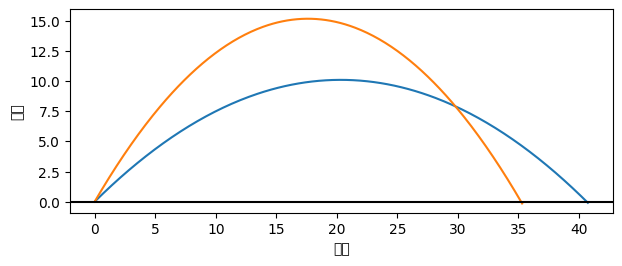

In [7]:
plot_trajectories(trajectory(45), trajectory(60))

### 12.1.2 궤적의 특성 측정하기

In [12]:
def landing_position(traj):
    return traj[1][-1] # 척도를 계산하는 함수, traj[1] : x좌표의 리스트, traj[1][-1] : 리스트의 마지막 성분

def hang_time(traj):
    return traj[0][-1] # 체공 시간, 즉 발사체가 지면에 닿을 때의 시계에 표시된 시간은 마지막 시간값과 같다.

def max_height(traj):
    return max(traj[2]) # 최대 높이 z위치 중 최댓값인데, z위치의 리스트는 궤적 출력 결과 중 세 번째 리스트에 해당한다.

### 12.1.3 서로 다른 발사각 살펴보기

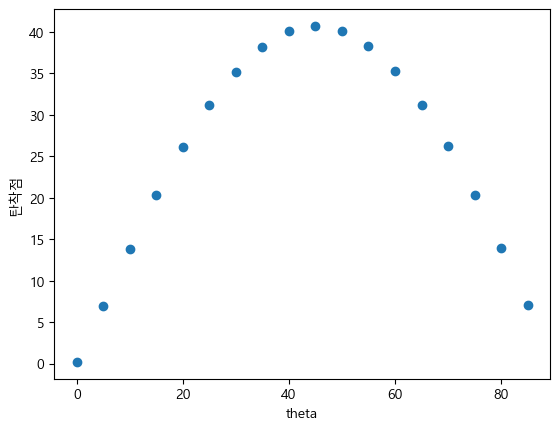

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline
angles = range(0, 90, 5)
landing_position = [landing_position(trajectory(theta)) for theta in angles]
plt.xlabel('theta')
plt.ylabel('탄착점')
plt.scatter(angles, landing_position)

### 12.1.4 연습문제

12.1 초기 높이 0에서 50도 각도로 대포를 발사했을 때, 대포의 도달거리를 구하라. 발사각도가 130도 일 때 발사할 경우 대포의 도달거리를 구하라.

In [13]:
landing_position(trajectory(50))

40.10994684444007

In [14]:
landing_position(trajectory(130))

-40.10994684444007

12.2 1초가 지날 때마다 궤적 그래프에 큰 점을 그리도록 plot_trajectories 함수를 개선하라. 이를 통해 플롯에서 시간이 얼마나 흘렀는지 관찰할 수 있다.

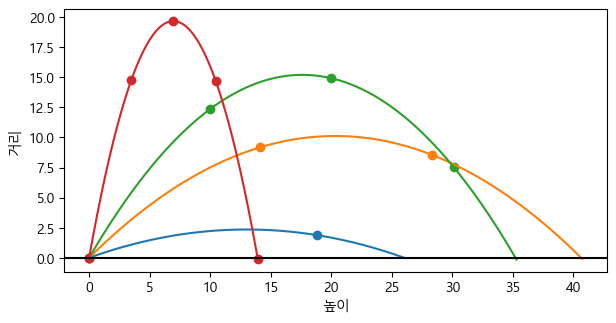

In [15]:
plot_trajectories(trajectory(20), trajectory(45), trajectory(60), trajectory(80), show_seconds=True)

12.3 각이 0도와 180도 사이일 때 발사 각도 대 체공 시간에 대한 산점도를 그려라. 체공 시간이 최대가 되는 발사 각도를 구하라.

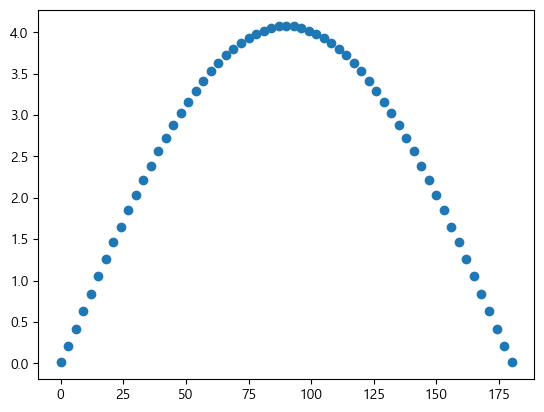

In [16]:
test_angles = range(0, 181, 3)
hang_times = [hang_time(trajectory(theta)) for theta in test_angles]
plt.scatter(test_angles, hang_times)

12.4 주어진 theta값 집합에 대해 임의의 척도를 계산한 결과를 플로팅해주는 함수 plot_trajectory_metric을 작성하라.

In [17]:
def plot_trajectory_metric(metric, thetas, **settings):
    plt.scatter(thetas, [metric(trajectory(theta, **settings)) for theta in thetas])

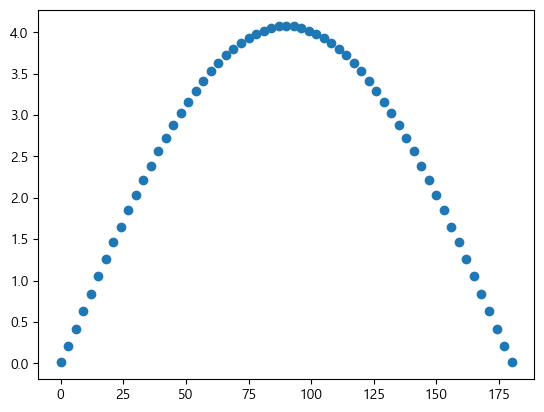

In [18]:
plot_trajectory_metric(hang_time, range(0, 181, 3))

12.5 초기 발사 높이가 10m일 때 포탄의 사거리가 가장 커지는 발사 각도의 근삿값을 구하라.

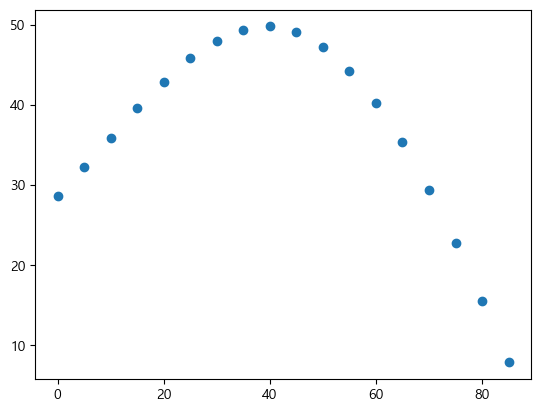

In [19]:
plot_trajectory_metric(landing_position, range(0,90, 5), height=10)

## 12.2 최적 사거리 계산하기

### 12.2.1 발사각의 함수로 발사체의 사거리 구하기

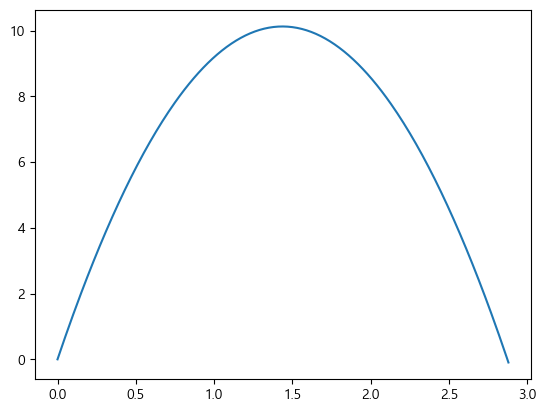

In [20]:
trj = trajectory(45)
ts, zs = trj[0], trj[2]
plt.plot(ts, zs)

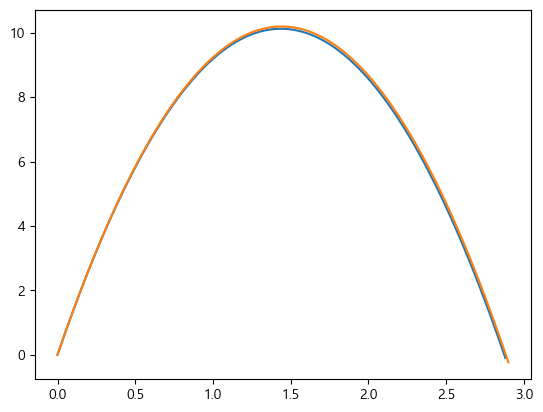

In [21]:
def z(t):
    return 20 * sin(45*pi/180) * t + (-9.81/2) * t ** 2

plt.plot(ts,zs)
plot_function(z, 0, 2.9)

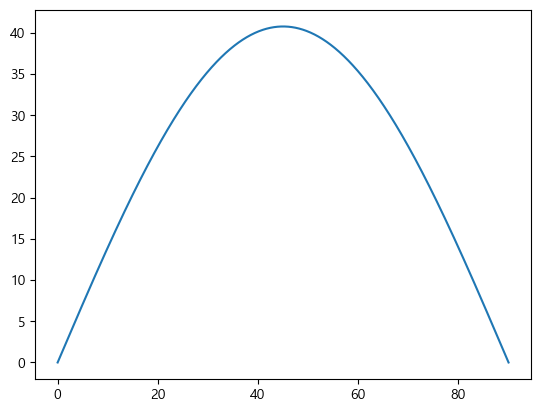

In [22]:
def r(theta):
    return (-2*20*20/-9.81)*sin(theta*pi/180)*cos(theta*pi/180)

plot_function(r,0,90)

### 12.2.2 최대 사거리 구하기

In [23]:
r(45)

40.774719673802245

In [24]:
r(135)

-40.77471967380224

## 12.3 시뮬레이션 개선하기

### 12.3.1 다른 차원 추가하기

In [25]:
def trajectory3d(theta, phi, speed=20, height=0, dt=0.01, g=-9.81):
    vx = speed * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = speed * cos(pi * theta / 180) * cos(pi * phi / 180) # 초기 y속도를 계산한다.
    vz = speed * sin(pi * theta / 180)
    t, x, y, z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= 0:
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [26]:
from mpl_toolkits.mplot3d import Axes3D
def plot_trajectory3d(traj):
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(7,7)
    ax = fig.add_subplot(projection='3d')
    ax.plot(traj[1],traj[2],traj[3])

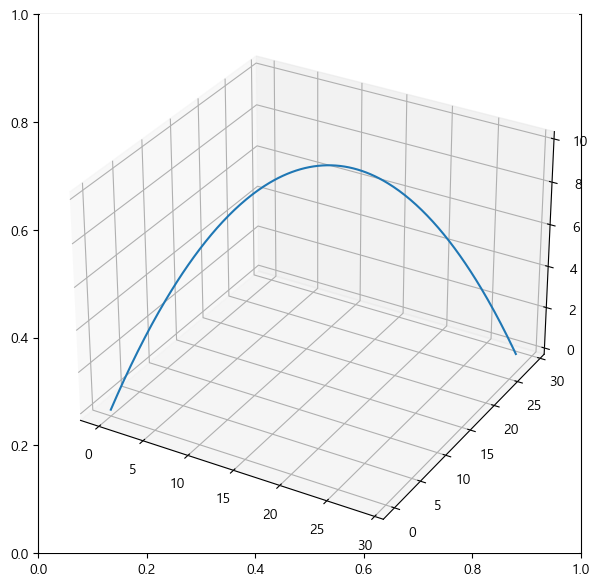

In [27]:
plot_trajectory3d(trajectory3d(45,45))

### 12.3.2 대포 주변의 지형 모델링하기

In [28]:
def flat_ground(x,y):
    return 0

In [29]:
def ridge(x,y):
    return (x**2 - 5*y**2) / 2500

In [30]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81,elevation=flat_ground):
    vx = speed * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = speed * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = speed * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= elevation(x,y):
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [31]:
def plot_trajectories_3d(*trajs,elevation=flat_ground,bounds=None,zbounds=None,shadows=False):
    fig, ax = plt.gcf(), plt.gca(projection='3d')
    fig.set_size_inches(7,7)    

    if not bounds:
        xmin = min([x for traj in trajs for x in traj[1]])
        xmax = max([x for traj in trajs for x in traj[1]])
        ymin = min([x for traj in trajs for x in traj[2]])
        ymax = max([x for traj in trajs for x in traj[2]])

        padding_x = 0.1 * (xmax-xmin)
        padding_y = 0.1 * (ymax-ymin)
        xmin -= padding_x
        xmax += padding_x
        ymin -= padding_y
        ymax += padding_x
    
    else:
        xmin, xmax, ymin, ymax = bounds
    

    plt.plot([xmin,xmax],[0,0],[0,0],c='k')
    plt.plot([0,0],[ymin,ymax],[0,0],c='k')

    g = np.vectorize(elevation)
    ground_x = np.linspace(xmin, xmax, 20)
    ground_y = np.linspace(ymin, ymax, 20)
    ground_x, ground_y = np.meshgrid(ground_x,ground_y)
    ground_z = g(ground_x,ground_y)
    ax.plot_surface(ground_x, ground_y, ground_z, cmap=cm.coolwarm, alpha=0.5,
                       linewidth=0, antialiased=True)
    for traj in trajs:
        ax.plot(traj[1],traj[2],traj[3])
        if shadows:
            ax.plot([traj[1][0],traj[1][-1]],[traj[2][0],traj[2][-1]],[0,0],c='gray',linestyle='dashed')
    
    if zbounds:
        ax.set_zlim(*zbounds)

C:\Users\user\AppData\Local\Temp\ipykernel_10760\3290748045.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig, ax = plt.gcf(), plt.gca(projection='3d')
c:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


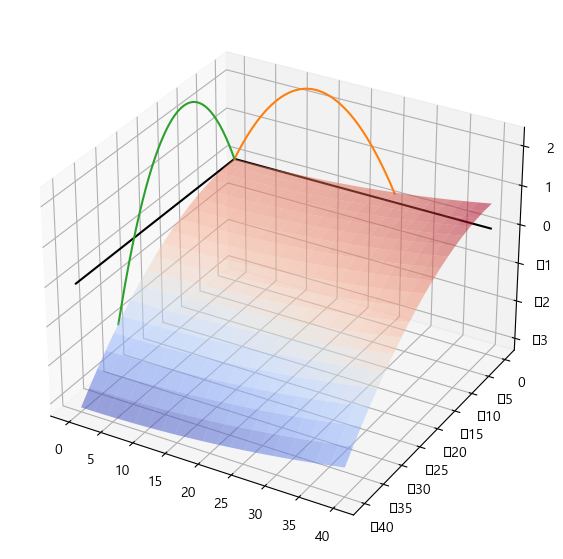

In [32]:
plot_trajectories_3d(
    trajectory3d(20,0,elevation=ridge),
    trajectory3d(20,270,elevation=ridge),
    bounds=[0,40,-40,0],
    elevation=ridge)

### 12.3.3 3차원에서 사거리 수식 구하기

In [33]:
from math import sqrt

B = 0.001 # 능선의 모양, 발사 각도, 중력 가속도에 관한 상수
C = 0.005
v = 20
g = -9.81

def velocity_components(v,theta,phi): # 초기 속도의 x성분, y성분, z성분을 구하는 보조 함수
    vx = v * cos(theta*pi/180) * cos(phi*pi/180)
    vy = v * cos(theta*pi/180) * sin(phi*pi/180)
    vz = v * sin(theta*pi/180)
    return vx,vy,vz
    
def landing_distance(theta,phi):
    vx, vy, vz = velocity_components(v, theta, phi)
    v_xy = sqrt(vx**2 + vy**2) # (xy평면과 평행한) 초기 속도의 수평 성분
    a = (g/2) - B * vx**2 + C * vy**2 # a, b는 상수
    b = vz
    landing_time = -b/a # 착지 시간에 대한 이차방정식에 해 -b/a
    landing_distance = v_xy * landing_time # 수평 이동 거리
    return landing_distance

## 12.4 경사상승법으로 사거리 최적화하기

### 12.4.1 발사 매개변수 대비 사거리 플로팅하기

In [34]:
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)

    fv = np.vectorize(f)

    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    z = fv(X,Y)
    
#     # x and y are bounds, so z should be the value *inside* those bounds.
#     # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)

C:\Users\user\AppData\Local\Temp\ipykernel_10760\2345232602.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(X,Y,z, cmap='plasma')


<Figure size 700x700 with 0 Axes>

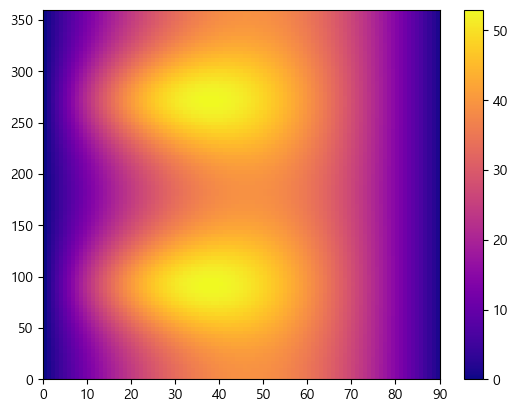

In [35]:
scalar_field_heatmap(landing_distance,0,90,0,360)

### 12.4.2 사거리 함수의 그라디언트

In [36]:
def plot_scalar_field(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False):
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased)

C:\Users\user\AppData\Local\Temp\ipykernel_10760\1378951377.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


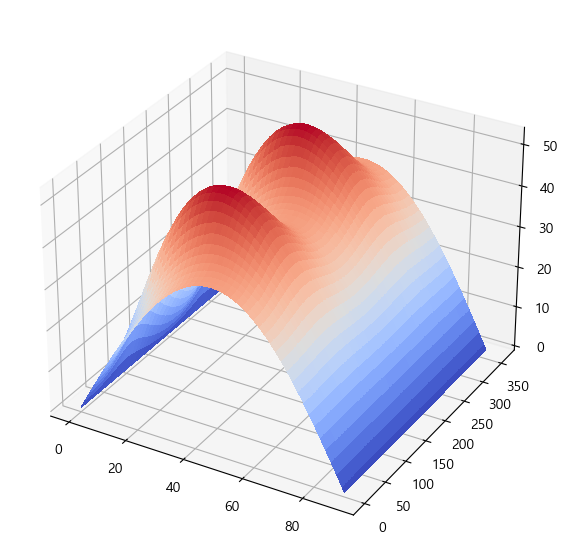

In [37]:
plot_scalar_field(landing_distance,0,90,0,360)

### 12.4.3 그라디언트로 오르막 방향 구하기

In [38]:
def secant_slope(f,xmin,xmax): # f(x)의 할선 기울기를 구한다.
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

In [39]:
def approx_gradient(f,x0,y0,dx=1e-6):
    partial_x = approx_derivative(lambda x: f(x,y0), x0, dx=dx)
    partial_y = approx_derivative(lambda y: f(x0,y), y0, dx=dx)
    return (partial_x,partial_y)

In [40]:
def landing_distance_gradient(theta,phi):
    return approx_gradient(landing_distance, theta, phi)

C:\Users\user\AppData\Local\Temp\ipykernel_10760\2345232602.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(X,Y,z, cmap='plasma')


<Figure size 700x700 with 0 Axes>

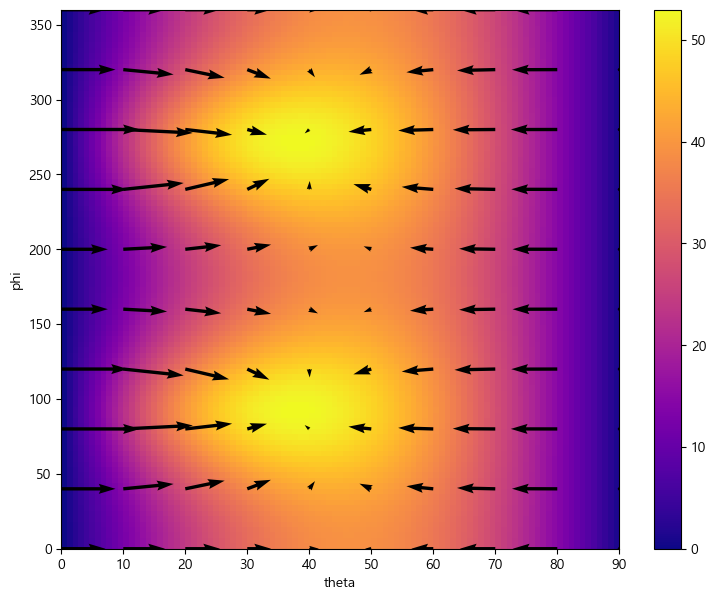

In [41]:
from vectors import to_polar, to_cartesian

def draw_arrow(tip,tail,color='k'):
    tip_length = (plt.xlim()[1] - plt.xlim()[0]) / 20.
    length = sqrt((tip[1]-tail[1])**2 + (tip[0]-tail[0])**2)
    new_length = length - tip_length
    new_y = (tip[1] - tail[1]) * (new_length / length)
    new_x = (tip[0] - tail[0]) * (new_length / length)
    plt.gca().arrow(tail[0], tail[1], new_x, new_y,
    head_width=tip_length/1.5, 
    head_length=tip_length/2,
    fc=color, ec=color)
    
def plot_vector_field(f,xmin,xmax,ymin,ymax,xsteps=10,ysteps=10,color='k'):

    X,Y = np.meshgrid(np.linspace(xmin,xmax, xsteps),np.linspace(ymin,ymax, ysteps))
    U = np.vectorize(lambda x,y : f(x,y)[0])(X,Y)
    V = np.vectorize(lambda x,y : f(x,y)[1])(X,Y)
    plt.quiver(X, Y, U, V,color=color)
    fig = plt.gcf()

scalar_field_heatmap(landing_distance,0,90,0,360)
plot_vector_field(landing_distance_gradient,0,90,0,360,xsteps=10,ysteps=10,color='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

C:\Users\user\AppData\Local\Temp\ipykernel_10760\2345232602.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(X,Y,z, cmap='plasma')


<Figure size 700x700 with 0 Axes>

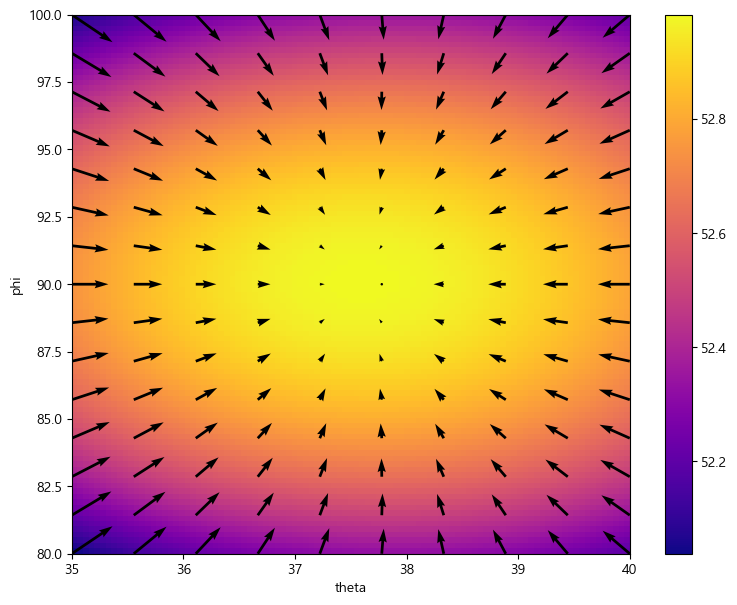

In [42]:
scalar_field_heatmap(landing_distance,35,40,80,100)
plot_vector_field(landing_distance_gradient,35,40,80,100,xsteps=10,ysteps=15,color='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

### 12.4.4 경사상승법 구현하기

In [43]:
from vectors import length

def gradient_ascent(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
    return x,y

def gradient_ascent_points(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += grad[0]
        y += grad[1]
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [44]:
gradient_ascent(landing_distance,36,83)

(37.58114751557887, 89.99992616039857)

In [45]:
gradient_ascent_points(landing_distance,36,83)

([36,
  36.122600166772905,
  36.23613677117784,
  36.34128767809185,
  36.43867738707969,
  36.528881661579746,
  36.612431593208484,
  36.689817410269534,
  36.76149182796271,
  36.82787319253559,
  36.889348238189385,
  36.94627463082189,
  36.998983312818545,
  37.04778060625894,
  37.09295017401476,
  37.1347547357105,
  37.17343773749891,
  37.20922482998986,
  37.24232519341257,
  37.27293280238169,
  37.30122755921293,
  37.32737638815892,
  37.35153417332558,
  37.373844629087024,
  37.394441177605785,
  37.41344766648102,
  37.43097908994937,
  37.44714219995173,
  37.46203614206898,
  37.47575300263992,
  37.48837829193029,
  37.49999144506543,
  37.51066624835594,
  37.520471237201555,
  37.529470054915286,
  37.537721861285455,
  37.545281588371104,
  37.55220026024622,
  37.5585252985331,
  37.5643007355652,
  37.56956745597163,
  37.57436347378886,
  37.57872406035837,
  37.58268198235851,
  37.58626769365101,
  37.58950943120426,
  37.59243345312513,
  37.59506413458223

C:\Users\user\AppData\Local\Temp\ipykernel_10760\2345232602.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(X,Y,z, cmap='plasma')


<Figure size 700x700 with 0 Axes>

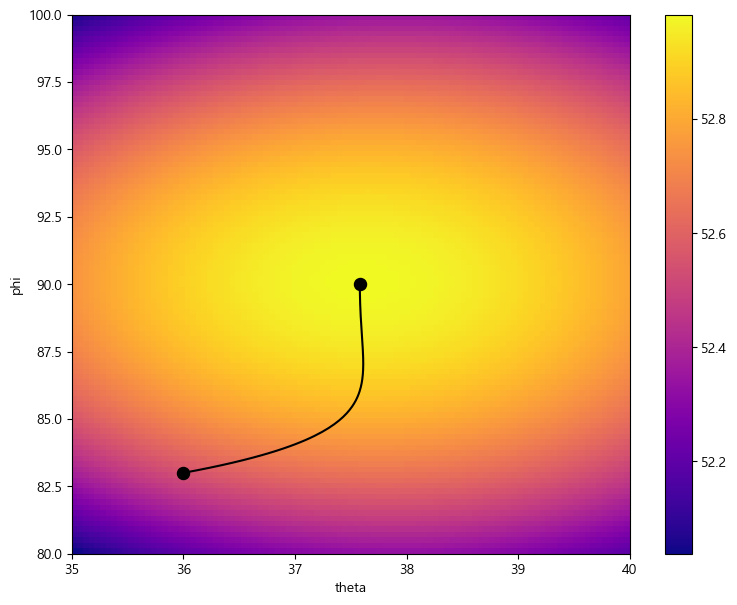

In [46]:
from vectors import to_polar, to_cartesian
scalar_field_heatmap(landing_distance,35,40,80,100)
plt.scatter([36,37.58114751557887],[83,89.99992616039857],c='k',s=75)
plt.plot(*gradient_ascent_points(landing_distance,36,83),c='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

In [47]:
landing_distance(37.58114751557887, 89.99992616039857)

52.98310689354378

### 12.4.5 연습문제

12.13 히트맵에서 점 20개를 무작위로 선택한 뒤 경사상승법 경로를 동시에 플로팅하라. 모든 경로는 두 개의 최대점 중 하나에서 끝나야 한다.

C:\Users\user\AppData\Local\Temp\ipykernel_10760\2345232602.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(X,Y,z, cmap='plasma')


<Figure size 700x700 with 0 Axes>

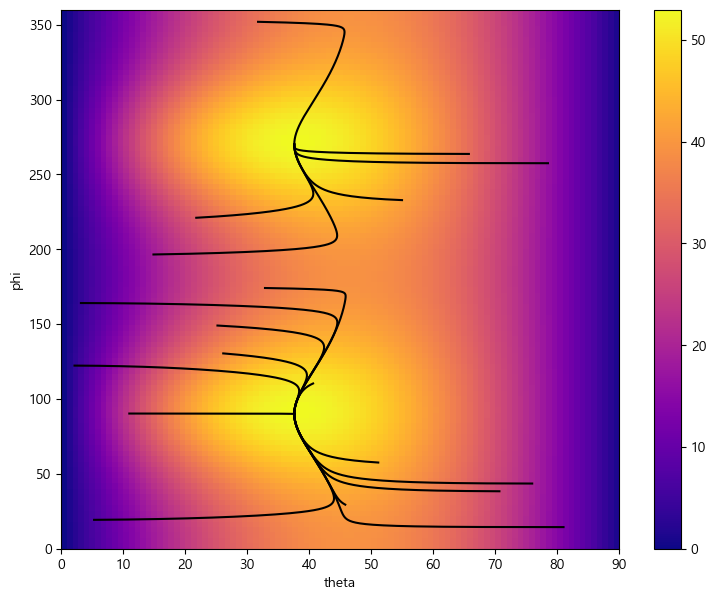

In [48]:
scalar_field_heatmap(landing_distance,0,90,0,360)
plt.xlabel('theta')
plt.ylabel('phi')
gap = gradient_ascent_points(landing_distance,60,190,1000)

from random import uniform
for x in range(0,20):
    gap = gradient_ascent_points(landing_distance,uniform(0,90),uniform(0,360))
    plt.plot(*gap,c='k')
plt.gcf().set_size_inches(9,7)

12.15 $r(\theta,\phi)$ 의 그라디언트가 0이지만 함수가 최대화되지 않는 $r(\theta,\phi)$ 위의 점을 구하라.

In [50]:
gradient_ascent(landing_distance,0,180)

(46.122613357930206, 180.0)

12.16 경사상승법으로 (36,83)에서 원점에 도달할 때까지 몇 번의 단계가 필요한지 답하라. 그라디언트 값을 그대로 더해 다음 점으로 이동하지 말고, 그라디언트의 1.5 배를 더할 때 더 적은 단계로 도달함을 보여라.

In [51]:
def gradient_ascent_points(f,xstart,ystart,rate=1,tolerance=1e-6):
    x = xstart
    y = ystart
    xs, ys = [x], [y]
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x += rate * grad[0]
        y += rate * grad[1]
        grad = approx_gradient(f,x,y)
        xs.append(x)
        ys.append(y)
    return xs, ys

In [52]:
def count_ascent_steps(f,x,y,rate=1):
    gap = gradient_ascent_points(f,x,y,rate=rate)
    print(gap[0][-1],gap[1][-1])
    return len(gap[0])

In [53]:
count_ascent_steps(landing_distance,36,83)

37.58114751557887 89.99992616039857


855

In [54]:
count_ascent_steps(landing_distance,36,83,rate=1.5)

37.58114755288237 89.99992556887184


568

In [55]:
count_ascent_steps(landing_distance,36,83,rate=20)

37.58114744807723 89.99992670041118


38

C:\Users\user\AppData\Local\Temp\ipykernel_10760\2345232602.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(X,Y,z, cmap='plasma')


<Figure size 700x700 with 0 Axes>

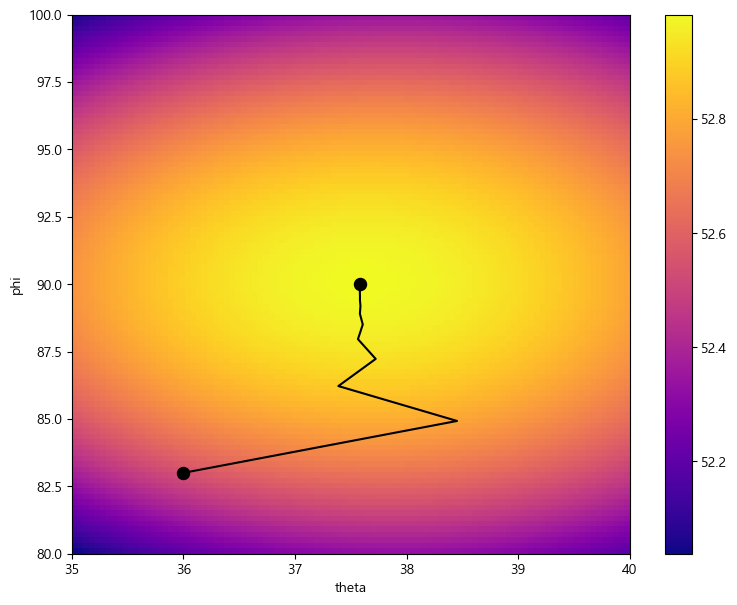

In [56]:
scalar_field_heatmap(landing_distance,35,40,80,100)
plt.scatter([36,37.58114751557887],[83,89.99992616039857],c='k',s=75)
plt.plot(*gradient_ascent_points(landing_distance,36,83,rate=20),c='k')
plt.xlabel('theta')
plt.ylabel('phi')
plt.gcf().set_size_inches(9,7)

12.17 $r$ 을  $\theta$와 $\phi$의 함수를 보고 시뮬레이션한 결과를 직접 사용해 gradient_ascent를 실행해라.

In [57]:
def simulated_distance_270(theta):
    ts,xs,ys,zs = trajectory3d(theta,270)
    return sqrt(xs[-1]**2 + ys[-1]**2)

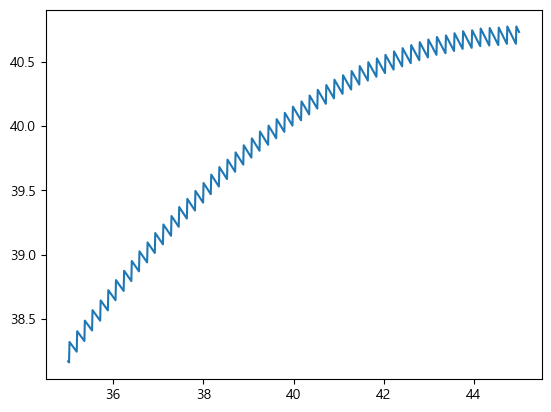

In [58]:
plot_function(simulated_distance_270,35,45)